<a href="https://colab.research.google.com/github/ArasHEsLaM1/machine_learning_with_python_jadi/blob/main/GBPUSD%25PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import time
#For LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers  import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model
import yfinance as yf


In [1]:
%pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 28.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
basic_data= yf.download("GBPUSD=X",start='2000-01-01',end='2021-1-13')


[*********************100%***********************]  1 of 1 completed


In [4]:
basic_data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.723811,1.727205,1.718390,1.718597,1.718597,0
2003-12-02,1.719010,1.732112,1.717298,1.730313,1.730313,0
2003-12-03,1.730493,1.731812,1.725209,1.728101,1.728101,0
2003-12-04,1.727414,1.728997,1.718302,1.720697,1.720697,0
2003-12-05,1.720608,1.733102,1.719809,1.733102,1.733102,0


In [5]:
basic_data.shape

(4451, 6)

In [6]:
df=pd.DataFrame(basic_data)

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.723811,1.727205,1.718390,1.718597,1.718597,0
2003-12-02,1.719010,1.732112,1.717298,1.730313,1.730313,0
2003-12-03,1.730493,1.731812,1.725209,1.728101,1.728101,0
2003-12-04,1.727414,1.728997,1.718302,1.720697,1.720697,0
2003-12-05,1.720608,1.733102,1.719809,1.733102,1.733102,0
...,...,...,...,...,...,...
2021-01-07,1.362231,1.363382,1.354133,1.362528,1.362528,0
2021-01-08,1.356815,1.363178,1.354041,1.356963,1.356963,0
2021-01-11,1.352100,1.352979,1.345424,1.351625,1.351625,0


In [8]:
df=df.drop(['Volume'], axis=1)

In [9]:
df


,Open,High,Low,Close,Adj Close
Date,,,,,
2003-12-01,1.723811,1.727205,1.718390,1.718597,1.718597
2003-12-02,1.719010,1.732112,1.717298,1.730313,1.730313
2003-12-03,1.730493,1.731812,1.725209,1.728101,1.728101
2003-12-04,1.727414,1.728997,1.718302,1.720697,1.720697
2003-12-05,1.720608,1.733102,1.719809,1.733102,1.733102
...,...,...,...,...,...
2021-01-07,1.362231,1.363382,1.354133,1.362528,1.362528
2021-01-08,1.356815,1.363178,1.354041,1.356963,1.356963
2021-01-11,1.352100,1.352979,1.345424,1.351625,1.351625


In [ ]:
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-01,1.325400,1.327100,1.321877,1.326260,1.326260
2020-01-02,1.325047,1.326788,1.312508,1.325030,1.325030
2020-01-03,1.314389,1.316119,1.305483,1.315270,1.315270
2020-01-06,1.308130,1.317400,1.306540,1.308010,1.308010
2020-01-07,1.317193,1.321213,1.309638,1.317003,1.317003
...,...,...,...,...,...
2022-07-04,1.210580,1.216515,1.208634,1.210273,1.210273
2022-07-05,1.211402,1.212606,1.190051,1.211446,1.211446
2022-07-06,1.194957,1.198638,1.187761,1.194914,1.194914


In [15]:
df=df.drop(['Adj Close'], axis=1)

In [ ]:
df

,Open,High,Low,Close
Date,,,,
2020-01-01,1.325400,1.327100,1.321877,1.326260
2020-01-02,1.325047,1.326788,1.312508,1.325030
2020-01-03,1.314389,1.316119,1.305483,1.315270
2020-01-06,1.308130,1.317400,1.306540,1.308010
2020-01-07,1.317193,1.321213,1.309638,1.317003
...,...,...,...,...
2022-07-04,1.210580,1.216515,1.208634,1.210273
2022-07-05,1.211402,1.212606,1.190051,1.211446
2022-07-06,1.194957,1.198638,1.187761,1.194914


In [ ]:
df.describe

<bound method NDFrame.describe of                 Open      High       Low     Close
Date                                              
2020-01-01  1.325400  1.327100  1.321877  1.326260
2020-01-02  1.325047  1.326788  1.312508  1.325030
2020-01-03  1.314389  1.316119  1.305483  1.315270
2020-01-06  1.308130  1.317400  1.306540  1.308010
2020-01-07  1.317193  1.321213  1.309638  1.317003
...              ...       ...       ...       ...
2022-07-04  1.210580  1.216515  1.208634  1.210273
2022-07-05  1.211402  1.212606  1.190051  1.211446
2022-07-06  1.194957  1.198638  1.187761  1.194914
2022-07-07  1.191895  1.202183  1.191001  1.192321
2022-07-08  1.203196  1.205531  1.192194  1.202805

[658 rows x 4 columns]>

In [10]:
 df.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-01-07,1.362231,1.363382,1.354133,1.362528,1.362528
2021-01-08,1.356815,1.363178,1.354041,1.356963,1.356963
2021-01-11,1.352100,1.352979,1.345424,1.351625,1.351625
2021-01-12,1.352576,1.363568,1.350767,1.352411,1.352411
2021-01-13,1.366890,1.369994,1.362249,1.367054,1.367054


In [11]:
df_close=df.reset_index()['Close']

In [12]:
df_close.shape


(4451,)

In [13]:
df_close

0       1.718597
1       1.730313
2       1.728101
3       1.720697
4       1.733102
          ...   
4446    1.362528
4447    1.356963
4448    1.351625
4449    1.352411
4450    1.367054
Name: Close, Length: 4451, dtype: float64

In [19]:
df__clos=pd.DataFrame( df_close)

In [20]:
df__clos

,Close
0,1.718597
1,1.730313
2,1.728101
3,1.720697
4,1.733102
...,...
4446,1.362528
4447,1.356963
4448,1.351625
4449,1.352411


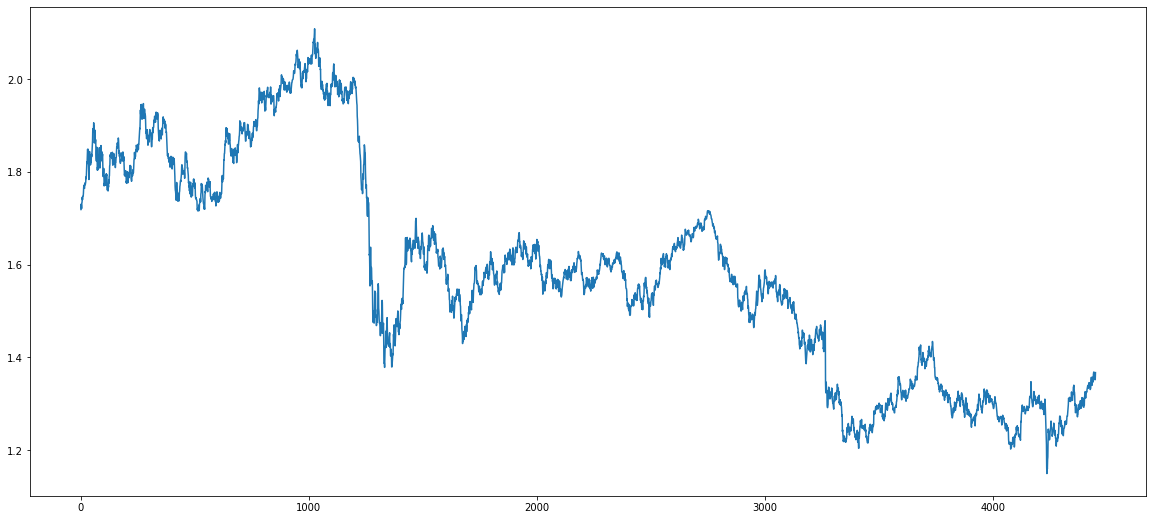

In [14]:
plt.figure(figsize=(20,9))
plt.plot(df_close)

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [17]:
df_close.shape

(4451, 1)

In [18]:
df_close

array([[0.5936439 ],
       [0.60586444],
       [0.60355636],
       ...,
       [0.210885  ],
       [0.21170488],
       [0.22697741]])

In [19]:
trainig_size=int(len(df_close)*0.8)
testing_size=len(df_close)-trainig_size
train_data,test_data=df_close[0:trainig_size,:],df_close[trainig_size:len(df_close),:1]

In [20]:
trainig_size,testing_size

(3560, 891)

In [21]:
#Convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]    #i=0, 0,1,2,3,-----99,100
    dataX.append(a)
    dataY.append(dataset[i+ time_step,0])
  return np.array(dataX),np.array(dataY)

In [22]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)


In [23]:
x_train

array([[0.5936439 , 0.60586444, 0.60355636, ..., 0.66791568, 0.66958765,
        0.67468948],
       [0.60586444, 0.60355636, 0.59583387, ..., 0.66958765, 0.67468948,
        0.68596392],
       [0.60355636, 0.59583387, 0.6087732 , ..., 0.67468948, 0.68596392,
        0.66321646],
       ...,
       [0.09284236, 0.09102119, 0.10301617, ..., 0.18086017, 0.1720644 ,
        0.16194044],
       [0.09102119, 0.10301617, 0.10228544, ..., 0.1720644 , 0.16194044,
        0.1609823 ],
       [0.10301617, 0.10228544, 0.10684627, ..., 0.16194044, 0.1609823 ,
        0.15559624]])

In [24]:
x_train.shape
#(number of records,time_step)

(3459, 100)

In [ ]:
#CREATE A LSTM MODEL

In [25]:
#RESHAPE INPUT TO BE [samples,time steps,feature] which is required for LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)    #last one for convert into 3D model
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [26]:
#CREAT LSTM MODEL CELL
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #100 for time steps  LSTM LAYER 1
model.add(LSTM(50,return_sequences=True))                                         #LSTM LAYER 2
model.add(LSTM(50))                                                               #LSTM LAYER 3
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')   #LOSS FUNCRION ALGORITHM=MSE , OPTIMIZER ALGORITHM =ADAM

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
55/55 [==============================] - 20s 232ms/step - loss: 0.0302 - val_loss: 0.0019
Epoch 2/100
55/55 [==============================] - 13s 237ms/step - loss: 0.0010 - val_loss: 5.9988e-04
Epoch 3/100
55/55 [==============================] - 12s 223ms/step - loss: 0.0010 - val_loss: 5.2655e-04
Epoch 4/100
55/55 [==============================] - 11s 201ms/step - loss: 9.0805e-04 - val_loss: 5.8423e-04
Epoch 5/100
55/55 [==============================] - 11s 203ms/step - loss: 9.1563e-04 - val_loss: 5.4535e-04
Epoch 6/100
55/55 [==============================] - 11s 205ms/step - loss: 8.5331e-04 - val_loss: 4.5100e-04
Epoch 7/100
55/55 [==============================] - 11s 204ms/step - loss: 8.0490e-04 - val_loss: 4.6203e-04
Epoch 8/100
55/55 [==============================] - 12s 215ms/step - loss: 7.9471e-04 - val_loss: 4.2826e-04
Epoch 9/100
55/55 [==============================] - 11s 205ms/step - loss: 7.1647e-04 - val_loss: 4.2405e-04
Epoch 10/100
55/55 [======

In [29]:
#DO THE PREDICTION AND CHECK PERFORMANCE METRICS
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
#calculate the RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1.1186482727656444

In [32]:
math.sqrt(mean_squared_error(y_test,test_predict))

1.1399499490650926

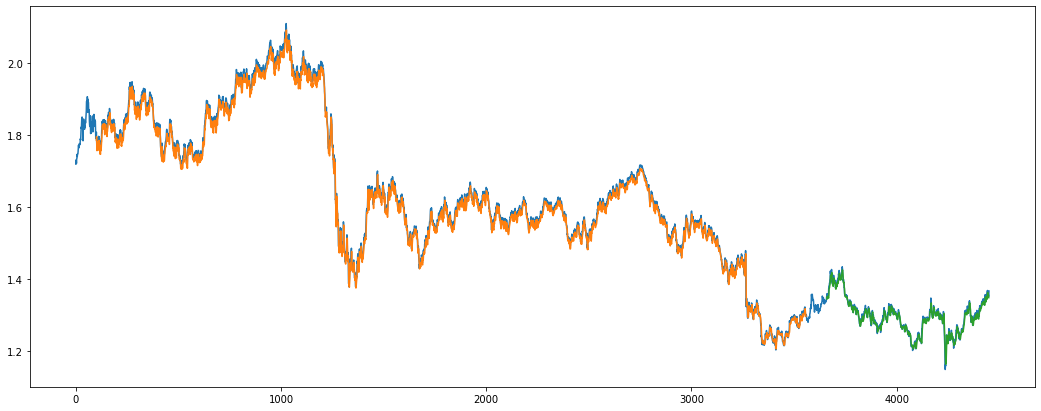

In [38]:
look_back=100
trainPredictplot = np.empty_like(df_close)
trainPredictplot[:, :]=np.nan
trainPredictplot[look_back:len(train_predict)+look_back,  :]=train_predict
testPredictionplot= np.empty_like(df_close)
testPredictionplot[:, :]= np.nan
testPredictionplot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :]=test_predict
plt.figure(figsize=(18,7))
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictplot)
plt.plot(testPredictionplot)
plt.show()

In [39]:
len(test_data)

891

In [40]:
x_input=test_data[791:].reshape(1,-1)

In [41]:
x_input.shape

(1, 100)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
temp_input #previous 100 days test data to feed the model

[0.17996630696175653,
 0.17785505229582776,
 0.19422075741323308,
 0.19505854504215114,
 0.19870089452293538,
 0.19368138033780324,
 0.184391735469986,
 0.18266940922543684,
 0.17395905384457855,
 0.1537518102019355,
 0.1569518903749043,
 0.13704355463667195,
 0.13686227022542807,
 0.1413591929287641,
 0.14502019306914127,
 0.15286652555992064,
 0.15448900860678205,
 0.15002565709071347,
 0.1383178920377972,
 0.13034249698263412,
 0.12757013860299837,
 0.13169902162369906,
 0.13271821800159178,
 0.1438437094620142,
 0.14311807446611557,
 0.14844010234984628,
 0.1451759882456083,
 0.14985133559238406,
 0.15626492441322837,
 0.14486439789267425,
 0.14844010234984628,
 0.15082875449278843,
 0.1603444453548728,
 0.16389627696776565,
 0.15028751235139914,
 0.15832818471513788,
 0.1468234631763241,
 0.14950256825799468,
 0.15168506844356888,
 0.15224483690682034,
 0.17080410826782488,
 0.16517956668549538,
 0.16273993607299908,
 0.1586814282078295,
 0.16036210131262085,
 0.15598329945337386,

In [44]:
#demonstrate prediction for the next 30 days
lst_output=[]
n_steps=100
i=0
while(i<30):
  if (len(temp_input)>100):
      x_input=np.array(temp_input[1:]) #SHIFT TO WRITE
      print("{}day input{}".format(i,x_input))
      x_input=x_input.reshape(1,-1)
      x_input=x_input.reshape((1,n_steps,1))
      yhat=model.predict(x_input,verbose=0)
      print('{}day output {}'.format(i,yhat))
      temp_input.extend(yhat[0].tolist())
      temp_input=temp_input[1:]
      lst_output.extend(yhat.tolist())
      i=i+1
  else:                                             #FIRST ELSE RUN AFTER PREDICTION AND OUR DATAS BE MORE THAN 100 WE PASS TO IF
    x_input=x_input.reshape((1,n_steps,1))#FIRST OF ALL RESHAPE THE DATA #avalin ghadam reshape
    yhat=model.predict(x_input,verbose=0) #YHAT==PREDICTION            #pass the data to the model
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())# ADD YHAT TO THE PREVIOUS DATAS #ezafe kardan prediction be gheimate ghabli 
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1
print(lst_output)

[0.21660052]
101
1day input[0.17785505 0.19422076 0.19505855 0.19870089 0.19368138 0.18439174
 0.18266941 0.17395905 0.15375181 0.15695189 0.13704355 0.13686227
 0.14135919 0.14502019 0.15286653 0.15448901 0.15002566 0.13831789
 0.1303425  0.12757014 0.13169902 0.13271822 0.14384371 0.14311807
 0.1484401  0.14517599 0.14985134 0.15626492 0.1448644  0.1484401
 0.15082875 0.16034445 0.16389628 0.15028751 0.15832818 0.14682346
 0.14950257 0.15168507 0.15224484 0.17080411 0.16517957 0.16273994
 0.15868143 0.1603621  0.1559833  0.1499385  0.149398   0.1491017
 0.16972585 0.15357637 0.17157799 0.17587709 0.17473641 0.18431838
 0.18042213 0.16972585 0.18003929 0.18020329 0.18406162 0.18378658
 0.18303546 0.18886404 0.19136111 0.19492824 0.19724167 0.19401622
 0.19165778 0.19217702 0.20112076 0.19571095 0.20449267 0.20057603
 0.19431376 0.19517045 0.19531953 0.18891949 0.19023175 0.1915465
 0.20339837 0.20949527 0.21650954 0.19896312 0.20392631 0.19870089
 0.20974258 0.21461438 0.21674006 0.20

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)#30days

In [46]:
len(df_close)

4451

In [47]:
df3=df_close.tolist()
df3.extend(lst_output)

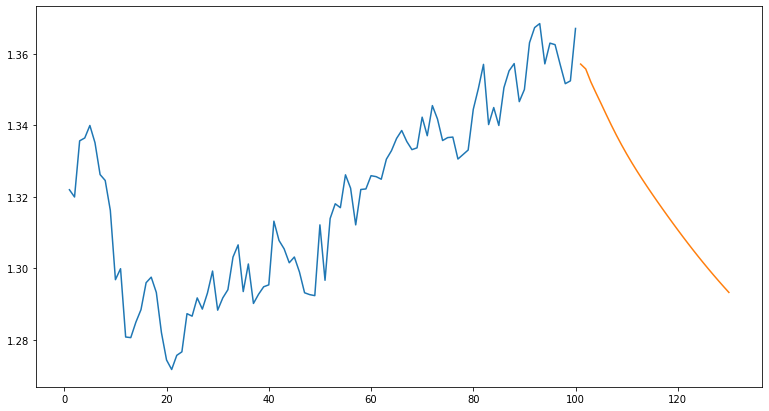

In [48]:
plt.figure(figsize=(13,7))
plt.plot(day_new,scaler.inverse_transform(df_close[4351:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

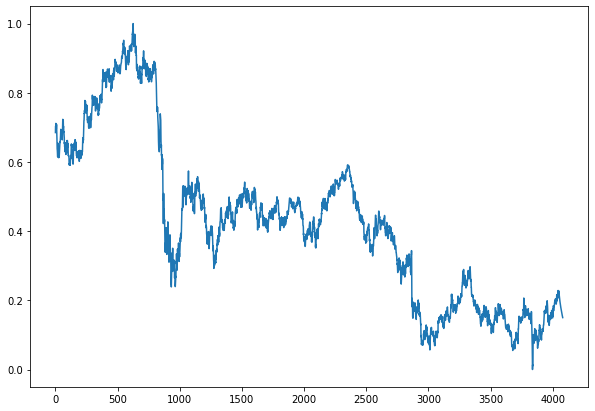

In [49]:
plt.figure(figsize=(10,7))
df3=df_close.tolist()
df3.extend(lst_output)
plt.plot(df3[400:])